In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
# загружаем данные
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Work/data_9415.csv')
df.sample(7)

,year,month,day,heigh,rainy,date,week,heigh_9403,rainy_9403,heigh_9404,...,heigh_9417,rainy_9417,heigh_9419,rainy_9419,heigh_9420,rainy_9420,heigh_9422,rainy_9422,heigh_9518,rainy_9518
141,2008,10,12,794.0,unknown,2008-10-12,41.0,70.0,_А,99.0,...,71.0,unknown,336.0,Ш),229.0,),243.0,Ш,113.0,unknown
3618,2017,7,28,1828.0,unknown,2017-07-28,30.0,62.0,unknown,85.0,...,59.0,unknown,452.0,>Л,392.0,unknown,306.0,Z,138.0,unknown
337,2008,2,29,710.0,I],2008-02-29,9.0,79.0,^I,125.0,...,62.0,^I,295.0,I,177.0,"""I",293.0,_I,139.0,^I
1664,2012,12,17,697.0,],2012-12-17,51.0,83.0,I,96.0,...,43.0,"""I",293.0,I,210.0,I,312.0,I,127.0,I
3109,2016,8,16,1966.0,unknown,2016-08-16,33.0,69.0,unknown,96.0,...,81.0,unknown,666.0,unknown,304.0,unknown,324.0,unknown,139.0,unknown
1579,2012,11,10,819.0,],2012-11-10,45.0,78.0,Z,105.0,...,43.0,"""I",298.0,I,216.0,I,352.0,^Ш,132.0,^Z
898,2010,12,14,835.0,],2010-12-14,50.0,59.0,I,105.0,...,39.0,"""I",382.0,I,172.0,I,317.0,Ш,99.0,^I


In [4]:
df.shape

(3653, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3653 non-null   int64  
 1   month       3653 non-null   int64  
 2   day         3653 non-null   int64  
 3   heigh       3653 non-null   float64
 4   rainy       3653 non-null   object 
 5   date        3653 non-null   object 
 6   week        3653 non-null   float64
 7   heigh_9403  3653 non-null   float64
 8   rainy_9403  3653 non-null   object 
 9   heigh_9404  3653 non-null   float64
 10  rainy_9404  3653 non-null   object 
 11  heigh_9405  3653 non-null   float64
 12  rainy_9405  3653 non-null   object 
 13  heigh_9406  3653 non-null   float64
 14  rainy_9406  3653 non-null   object 
 15  heigh_9408  3653 non-null   float64
 16  rainy_9408  3653 non-null   object 
 17  heigh_9410  3653 non-null   float64
 18  rainy_9410  3653 non-null   object 
 19  heigh_9413  3653 non-null  

In [6]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'])

In [7]:
df.columns

Index(['year', 'month', 'day', 'heigh', 'rainy', 'date', 'week', 'heigh_9403',
       'rainy_9403', 'heigh_9404', 'rainy_9404', 'heigh_9405', 'rainy_9405',
       'heigh_9406', 'rainy_9406', 'heigh_9408', 'rainy_9408', 'heigh_9410',
       'rainy_9410', 'heigh_9413', 'rainy_9413', 'heigh_9416', 'rainy_9416',
       'heigh_9417', 'rainy_9417', 'heigh_9419', 'rainy_9419', 'heigh_9420',
       'rainy_9420', 'heigh_9422', 'rainy_9422', 'heigh_9518', 'rainy_9518'],
      dtype='object')

In [8]:
columns_heigh = df[['heigh', 'heigh_9403', 'heigh_9404', 'heigh_9405', 'heigh_9406',
   'heigh_9408', 'heigh_9410', 'heigh_9413', 'heigh_9416', 'heigh_9417',
   'heigh_9419', 'heigh_9420', 'heigh_9422', 'heigh_9518']]

In [9]:
def split_and_replace(value):
  if ":" in value or '-' in value:
    parts = value.split(":")
    new_value = parts[0]
    if '-' in new_value:
      new_value = new_value.replace("-", "")
    return new_value
  else:
    return value

for column in columns_heigh:
  df[column].astype(str).apply(split_and_replace).replace("-", "") #привели к строковому типу, чтобы использовать apply
  df[column] = pd.to_numeric(df[column], errors='coerce') # преобразовали столбец в числовой формат
  df[column] = df[column].replace(np.nan, 0) # все наны заменили нулями
  df.loc[df[column]==0, column] = 1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        3653 non-null   int64         
 1   month       3653 non-null   int64         
 2   day         3653 non-null   int64         
 3   heigh       3653 non-null   float64       
 4   rainy       3653 non-null   object        
 5   date        3653 non-null   datetime64[ns]
 6   week        3653 non-null   float64       
 7   heigh_9403  3653 non-null   float64       
 8   rainy_9403  3653 non-null   object        
 9   heigh_9404  3653 non-null   float64       
 10  rainy_9404  3653 non-null   object        
 11  heigh_9405  3653 non-null   float64       
 12  rainy_9405  3653 non-null   object        
 13  heigh_9406  3653 non-null   float64       
 14  rainy_9406  3653 non-null   object        
 15  heigh_9408  3653 non-null   float64       
 16  rainy_9408  3653 non-nul

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode = ['rainy', 'rainy_9403', 'rainy_9404', 'rainy_9405',
                     'rainy_9406','rainy_9408', 'rainy_9410', 'rainy_9413',
                     'rainy_9416', 'rainy_9417', 'rainy_9419', 'rainy_9420',
                     'rainy_9422', 'rainy_9518']

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    
df.head()

,year,month,day,heigh,rainy,date,week,heigh_9403,rainy_9403,heigh_9404,...,heigh_9417,rainy_9417,heigh_9419,rainy_9419,heigh_9420,rainy_9420,heigh_9422,rainy_9422,heigh_9518,rainy_9518
0,2008,1,1,964.0,22,2008-01-01,1.0,76.0,45,102.0,...,46.0,40,315.0,33,178.0,20,343.0,14,125.0,27
1,2008,2,1,795.0,17,2008-02-01,5.0,78.0,13,108.0,...,56.0,40,296.0,33,177.0,1,309.0,12,134.0,27
2,2008,3,1,709.0,17,2008-03-01,9.0,78.0,45,124.0,...,62.0,40,295.0,48,177.0,43,293.0,12,142.0,27
3,2008,4,1,694.0,17,2008-04-01,14.0,79.0,45,130.0,...,66.0,40,298.0,17,178.0,1,284.0,12,160.0,0
4,2008,5,1,686.0,35,2008-05-01,18.0,87.0,46,140.0,...,73.0,40,298.0,17,179.0,43,276.0,7,160.0,27


In [12]:
df.describe()

,year,month,day,heigh,rainy,week,heigh_9403,rainy_9403,heigh_9404,rainy_9404,...,heigh_9417,rainy_9417,heigh_9419,rainy_9419,heigh_9420,rainy_9420,heigh_9422,rainy_9422,heigh_9518,rainy_9518
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,...,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,2012.499589,6.522310,15.731454,795.454421,28.255133,26.608541,83.065699,36.597865,110.920613,37.746783,...,69.638927,30.055297,359.737476,39.285245,220.188065,35.940871,263.086230,19.701889,140.911853,22.107309
std,2.873056,3.449345,8.802064,495.883122,16.741611,15.066921,62.730771,20.340060,86.522384,19.239404,...,78.588264,18.891855,153.088583,19.407127,107.117459,17.575227,97.703597,11.942455,124.566598,10.447594
min,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2010.000000,4.000000,8.000000,563.000000,11.000000,14.000000,63.000000,13.000000,78.000000,14.000000,...,27.000000,13.000000,298.000000,17.000000,195.000000,25.000000,244.000000,7.000000,92.000000,10.000000
50%,2012.000000,7.000000,16.000000,663.000000,37.000000,27.000000,72.000000,45.000000,97.000000,49.000000,...,50.000000,40.000000,338.000000,48.000000,213.000000,43.000000,270.000000,27.000000,120.000000,27.000000
75%,2015.000000,10.000000,23.000000,859.000000,43.000000,40.000000,87.000000,52.000000,118.000000,54.000000,...,77.000000,46.000000,412.000000,56.000000,246.000000,49.000000,298.000000,28.000000,138.000000,31.000000
max,2017.000000,12.000000,31.000000,2889.000000,58.000000,53.000000,548.000000,68.000000,768.000000,68.000000,...,750.000000,57.000000,971.000000,73.000000,772.000000,61.000000,719.000000,39.000000,971.000000,43.000000


In [13]:
df['heigh'].describe()

count    3653.000000
mean      795.454421
std       495.883122
min         1.000000
25%       563.000000
50%       663.000000
75%       859.000000
max      2889.000000
Name: heigh, dtype: float64

In [14]:
df_1 = df[['heigh', 'rainy', 'heigh_9403',
       'rainy_9403', 'heigh_9404', 'rainy_9404', 'heigh_9405', 'rainy_9405',
       'heigh_9406', 'rainy_9406', 'heigh_9408', 'rainy_9408', 'heigh_9410',
       'rainy_9410', 'heigh_9413', 'rainy_9413', 'heigh_9416', 'rainy_9416',
       'heigh_9417', 'rainy_9417', 'heigh_9419', 'rainy_9419', 'heigh_9420',
       'rainy_9420', 'heigh_9422', 'rainy_9422', 'heigh_9518', 'rainy_9518']]

In [15]:
df_1.describe().transpose()[['mean', 'std']]

,mean,std
heigh,795.454421,495.883122
rainy,28.255133,16.741611
heigh_9403,83.065699,62.730771
rainy_9403,36.597865,20.340060
heigh_9404,110.920613,86.522384
rainy_9404,37.746783,19.239404
heigh_9405,212.515193,135.116140
rainy_9405,21.717219,10.381666
heigh_9406,171.836846,187.711594
rainy_9406,22.947714,10.472478


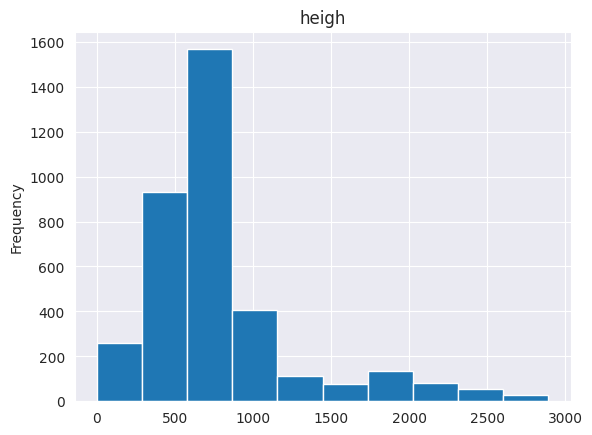

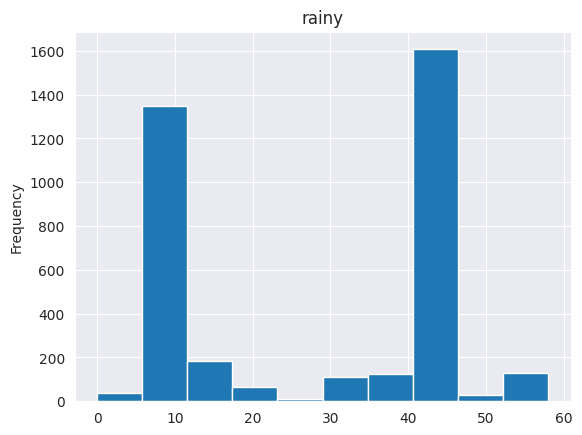

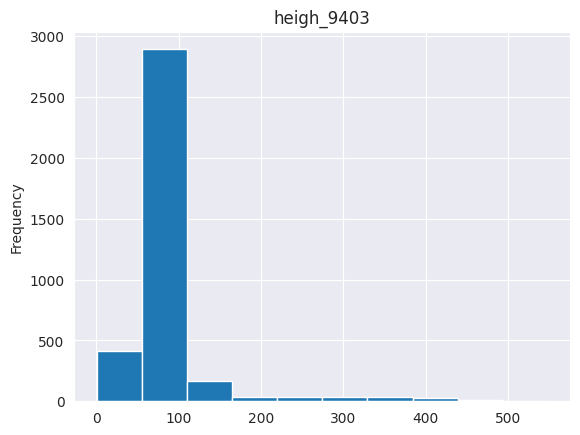

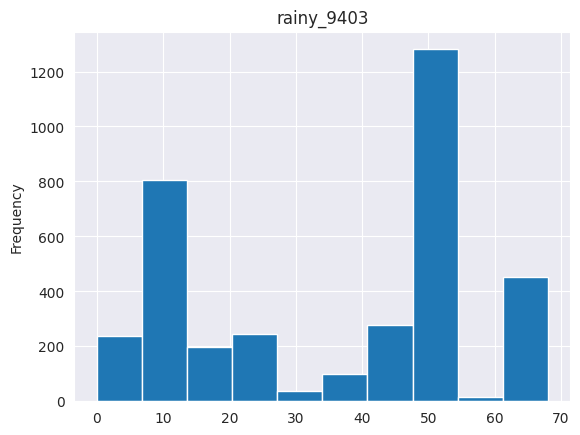

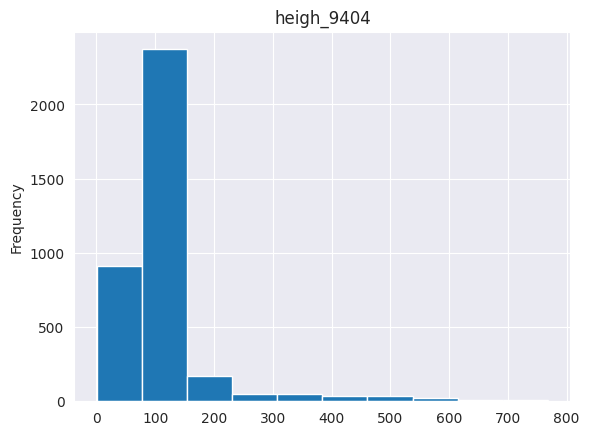

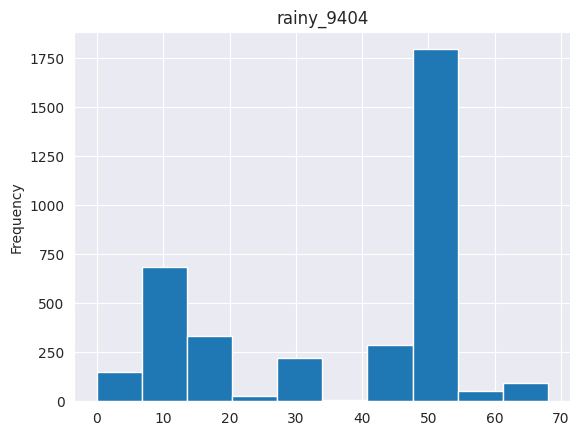

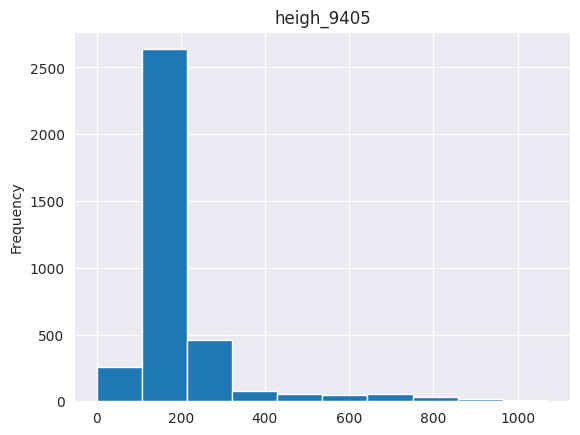

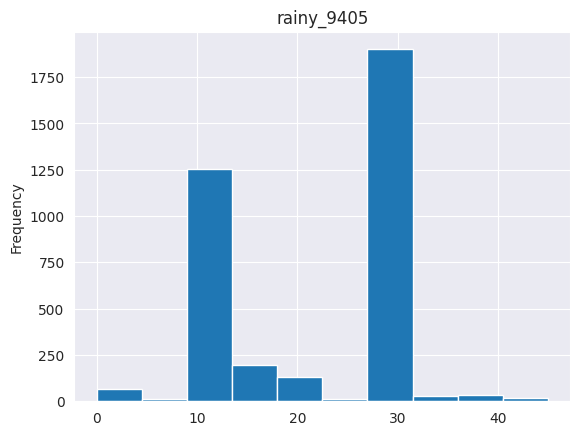

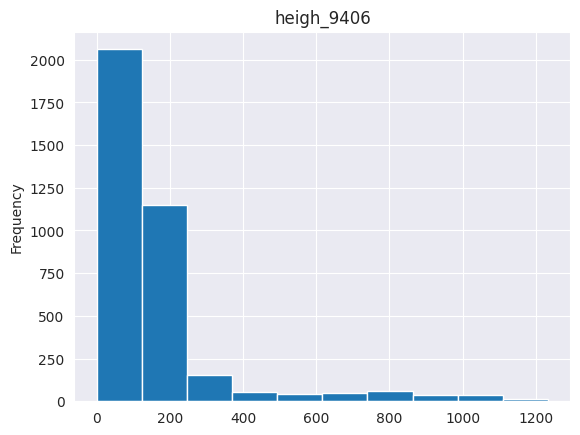

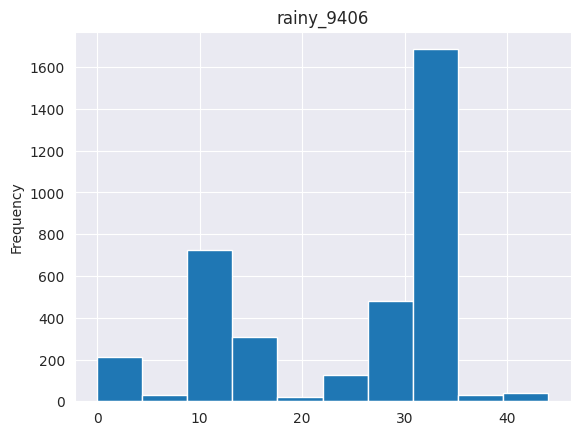

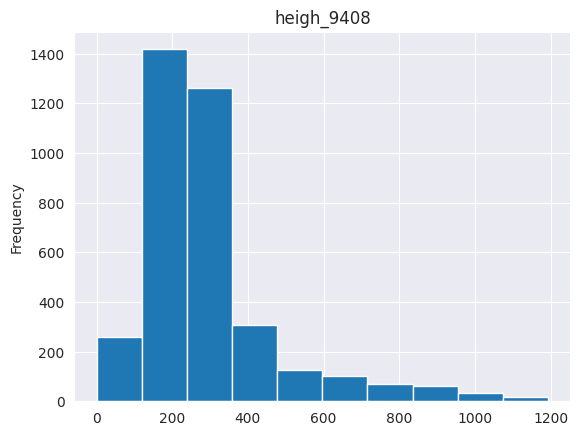

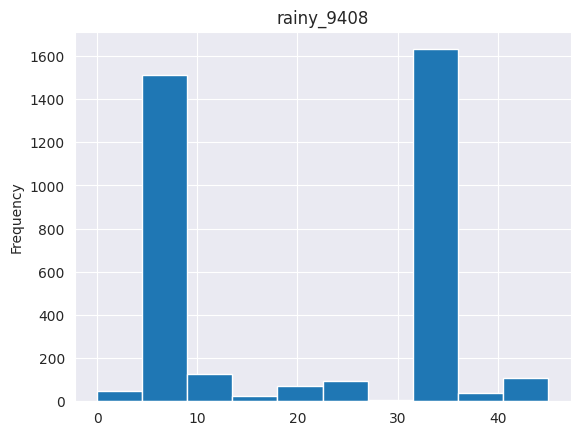

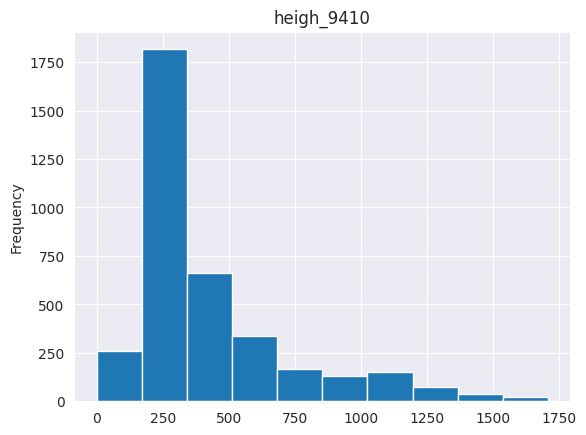

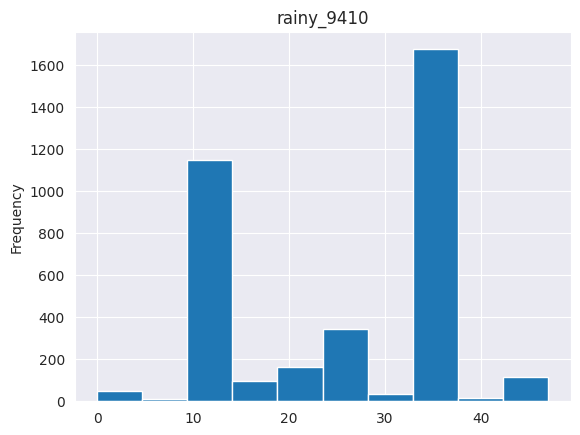

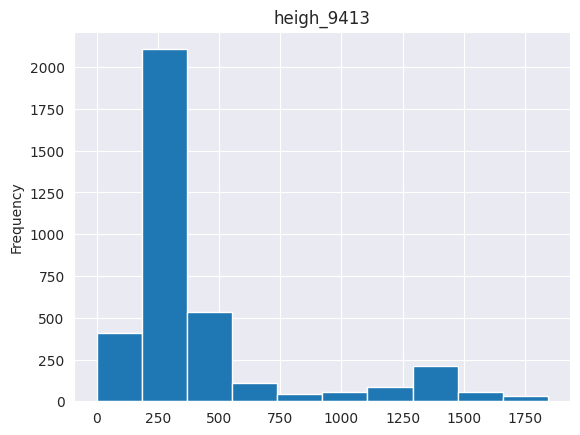

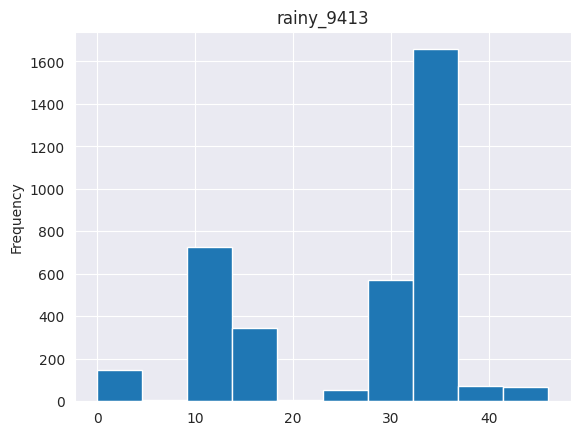

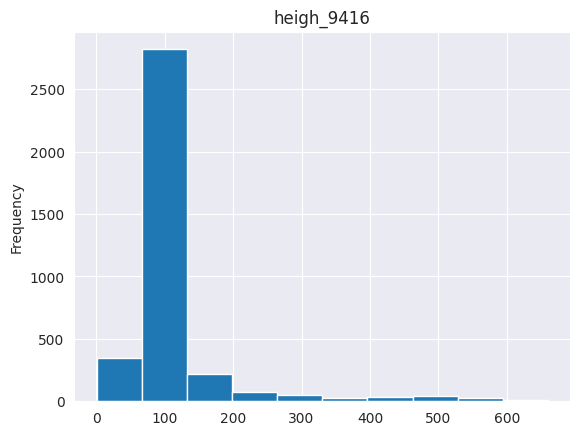

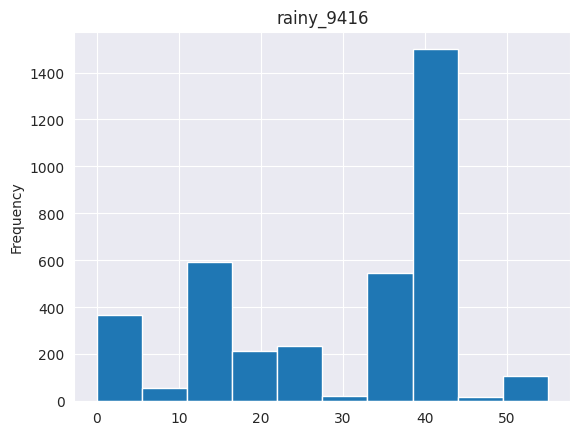

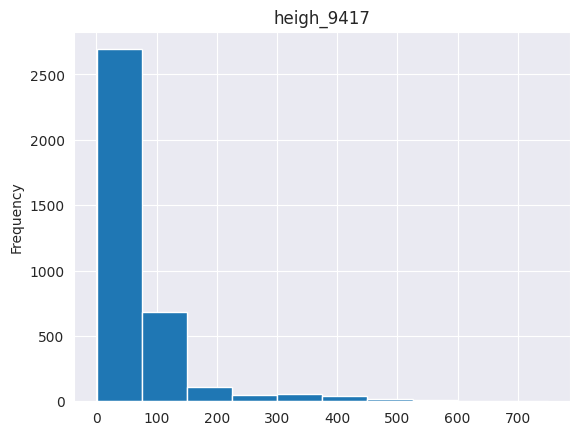

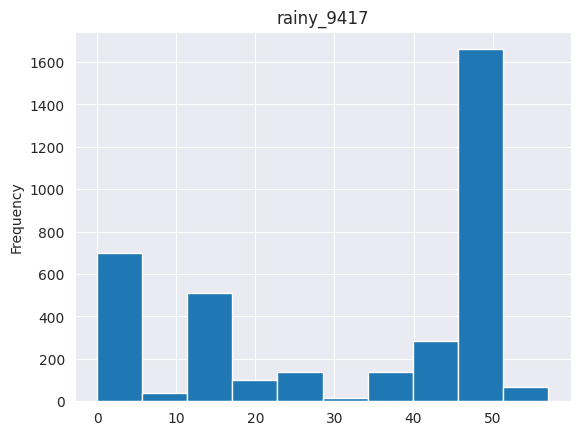

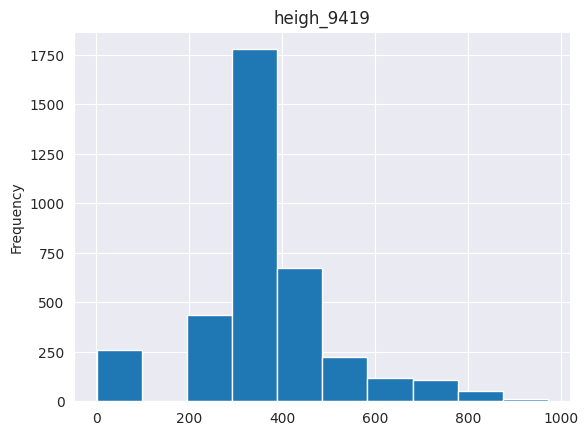

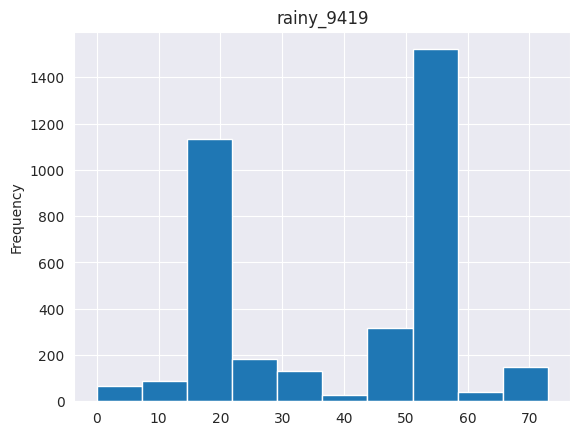

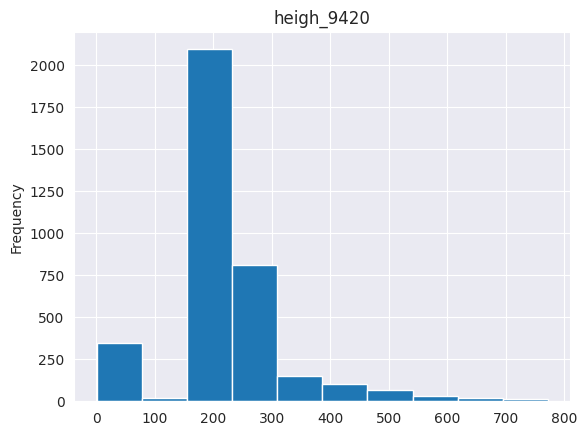

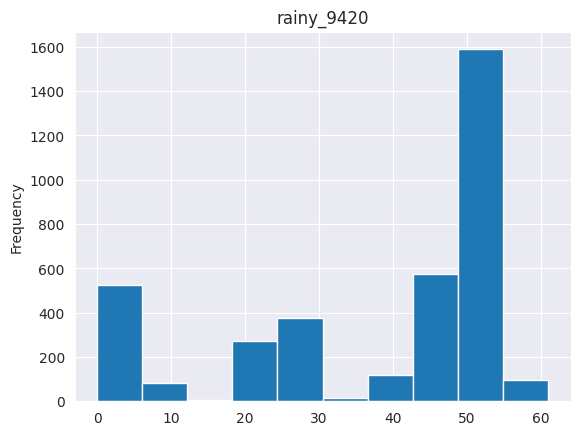

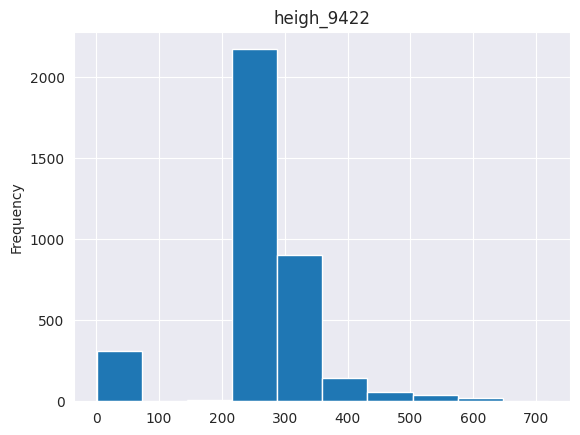

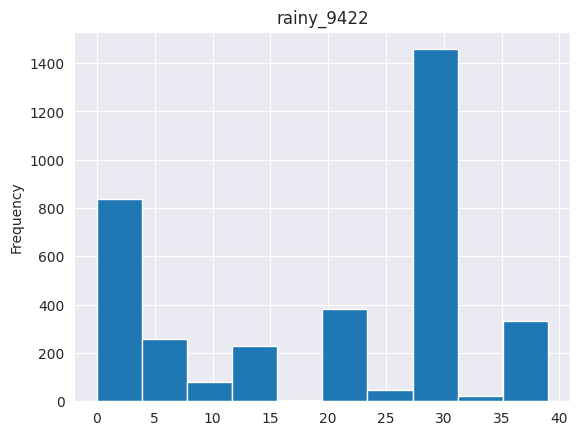

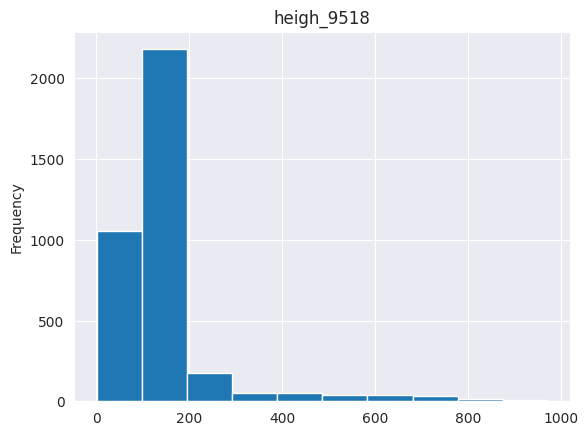

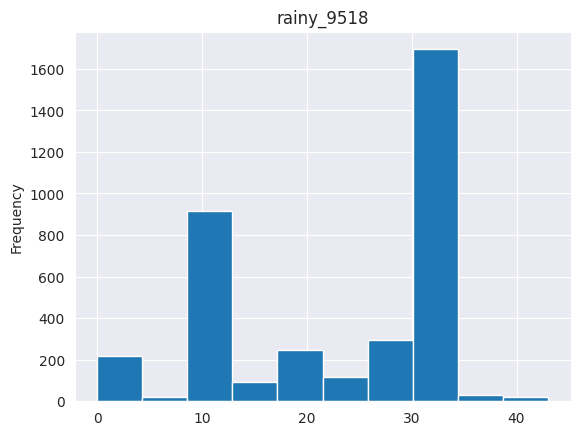

In [ ]:
for column in df_1:
    plt.figure(column)
    plt.title(column)
    df[column].plot(kind = 'hist');

In [16]:
df_year = df.groupby('year')['heigh'].mean()
df_year

year
2008    1030.554645
2009     840.345205
2010     858.936986
2011     914.958904
2012     777.532787
2013     732.471233
2014     729.893151
2015     742.413699
2016     627.297814
2017     700.005479
Name: heigh, dtype: float64

In [17]:
df_month = df.groupby('month')['heigh'].mean()
df_month

month
1      408.874194
2      600.469965
3      351.148387
4      566.166667
5     1177.967742
6     1155.310000
7     1046.048387
8     1168.987097
9      805.150000
10     713.877419
11     833.566667
12     706.658065
Name: heigh, dtype: float64

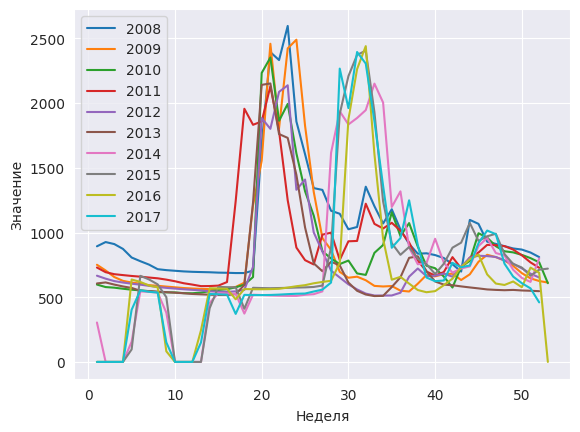

In [18]:
# группировка данных по годам и неделям
grouped = df.groupby(['year', 'week'])

# вычисление среднего значения для каждой недели по годам
mean_values = grouped['heigh'].mean()

# создание графика
fig, ax = plt.subplots()
for year in df['year'].unique():
    mean_values[year].plot(ax=ax, label=year)
ax.legend()
ax.set_xlabel('Неделя')
ax.set_ylabel('Значение')
plt.show()

In [19]:
df_rainy = df[['year', 'month', 'week', 'rainy', 'rainy_9403', 'rainy_9404', 'rainy_9405',
                     'rainy_9406','rainy_9408', 'rainy_9410', 'rainy_9413',
                     'rainy_9416', 'rainy_9417', 'rainy_9419', 'rainy_9420',
                     'rainy_9422', 'rainy_9518']]

In [20]:
df_heigh = df[['year', 'month', 'week', 'heigh', 'heigh_9403', 'heigh_9404', 'heigh_9405',
               'heigh_9406', 'heigh_9408', 'heigh_9410', 'heigh_9413', 'heigh_9416', 'heigh_9417',
               'heigh_9419', 'heigh_9420', 'heigh_9422', 'heigh_9518']]

In [21]:
df_heigh.groupby('year')[df_heigh.columns].mean().T

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
year,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000
month,6.513661,6.526027,6.526027,6.526027,6.513661,6.526027,6.526027,6.526027,6.513661,6.526027
week,26.360656,27.000000,26.578082,26.569863,26.500000,26.430137,26.430137,27.000000,26.647541,26.569863
heigh,1030.554645,840.345205,858.936986,914.958904,777.532787,732.471233,729.893151,742.413699,627.297814,700.005479
heigh_9403,85.931694,94.252055,81.265753,76.936986,90.855191,100.167123,73.347945,93.336986,76.483607,58.068493
heigh_9404,126.333333,145.884932,118.545205,105.830137,116.027322,120.295890,82.945205,110.378082,99.538251,83.402740
heigh_9405,235.882514,259.865753,217.600000,207.394521,222.469945,232.515068,183.630137,215.978082,186.322404,163.473973
heigh_9406,225.874317,224.704110,165.504110,156.739726,175.289617,178.178082,158.169863,176.000000,137.565574,120.279452
heigh_9408,361.685792,320.920548,317.304110,322.504110,285.475410,282.761644,282.317808,280.460274,258.071038,250.153425
heigh_9410,567.139344,456.671233,430.673973,487.372603,396.508197,396.408219,436.975342,431.663014,336.103825,367.589041


In [22]:
df_heigh.groupby('month')[df_heigh.columns].mean().T

month,1,2,3,4,5,6,7,8,9,10,11,12
year,2012.500000,2012.494700,2012.500000,2012.500000,2012.500000,2012.500000,2012.500000,2012.500000,2012.500000,2012.500000,2012.500000,2012.500000
month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
week,4.406452,6.950530,11.187097,15.543333,19.896774,24.260000,28.612903,33.041935,37.403333,41.754839,46.113333,48.964516
heigh,408.874194,600.469965,351.148387,566.166667,1177.967742,1155.310000,1046.048387,1168.987097,805.150000,713.877419,833.566667,706.658065
heigh_9403,47.077419,81.522968,51.903226,106.416667,159.461290,93.313333,120.529032,73.083871,66.793333,63.993548,65.316667,67.229032
heigh_9404,62.380645,101.946996,71.816129,127.306667,223.158065,132.770000,171.270968,99.361290,90.886667,82.506452,83.326667,83.232258
heigh_9405,113.141935,189.639576,118.625806,214.446667,401.480645,251.330000,338.093548,214.990323,183.786667,171.290323,175.816667,174.751613
heigh_9406,74.280645,110.537102,73.003226,123.390000,424.332258,199.656667,360.693548,203.248387,128.550000,117.987097,122.726667,114.651613
heigh_9408,143.064516,226.293286,131.025806,216.083333,447.809677,381.600000,507.967742,435.738710,290.166667,261.012903,260.390000,245.625806
heigh_9410,168.835484,266.985866,160.296774,269.350000,645.367742,657.656667,664.529032,715.216129,489.306667,410.564516,407.360000,302.074194


In [23]:
df_rainy.groupby('year')[df_rainy.columns].mean().T

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
year,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000
month,6.513661,6.526027,6.526027,6.526027,6.513661,6.526027,6.526027,6.526027,6.513661,6.526027
week,26.360656,27.000000,26.578082,26.569863,26.500000,26.430137,26.430137,27.000000,26.647541,26.569863
rainy,25.161202,25.657534,25.863014,25.958904,24.234973,27.934247,32.172603,32.734247,30.344262,32.504110
rainy_9403,38.920765,29.969863,36.816438,35.194521,35.030055,33.953425,38.794521,41.008219,39.054645,37.227397
rainy_9404,34.972678,35.186301,35.323288,36.150685,36.726776,34.821918,42.063014,40.810959,38.420765,43.000000
rainy_9405,21.210383,20.928767,20.260274,20.649315,20.928962,19.473973,24.632877,23.827397,22.314208,22.947945
rainy_9406,21.166667,20.838356,22.550685,20.424658,21.972678,23.676712,23.427397,27.060274,23.961749,24.402740
rainy_9408,19.079235,18.526027,18.361644,20.575342,18.532787,18.564384,24.224658,23.027397,21.308743,20.989041
rainy_9410,23.295082,23.312329,21.753425,24.471233,22.770492,23.621918,27.471233,26.169863,25.945355,26.276712


In [24]:
for x in df_heigh.columns:
    q75, q25 = np.percentile(df_heigh.loc[:, x], [75, 25])
    qr = q75 - q25
    max = q75 + 1.5 * qr
    min = q25 - 1.5 * qr
    df_heigh.loc[df_heigh[x] < min, x] = np.nan
    df_heigh.loc[df_heigh[x] > max, x] = np.nan
df_heigh.isnull().sum()

year            0
month           0
week            0
heigh         681
heigh_9403    501
heigh_9404    507
heigh_9405    689
heigh_9406    764
heigh_9408    661
heigh_9410    395
heigh_9413    522
heigh_9416    710
heigh_9417    280
heigh_9419    539
heigh_9420    703
heigh_9422    505
heigh_9518    642
dtype: int64

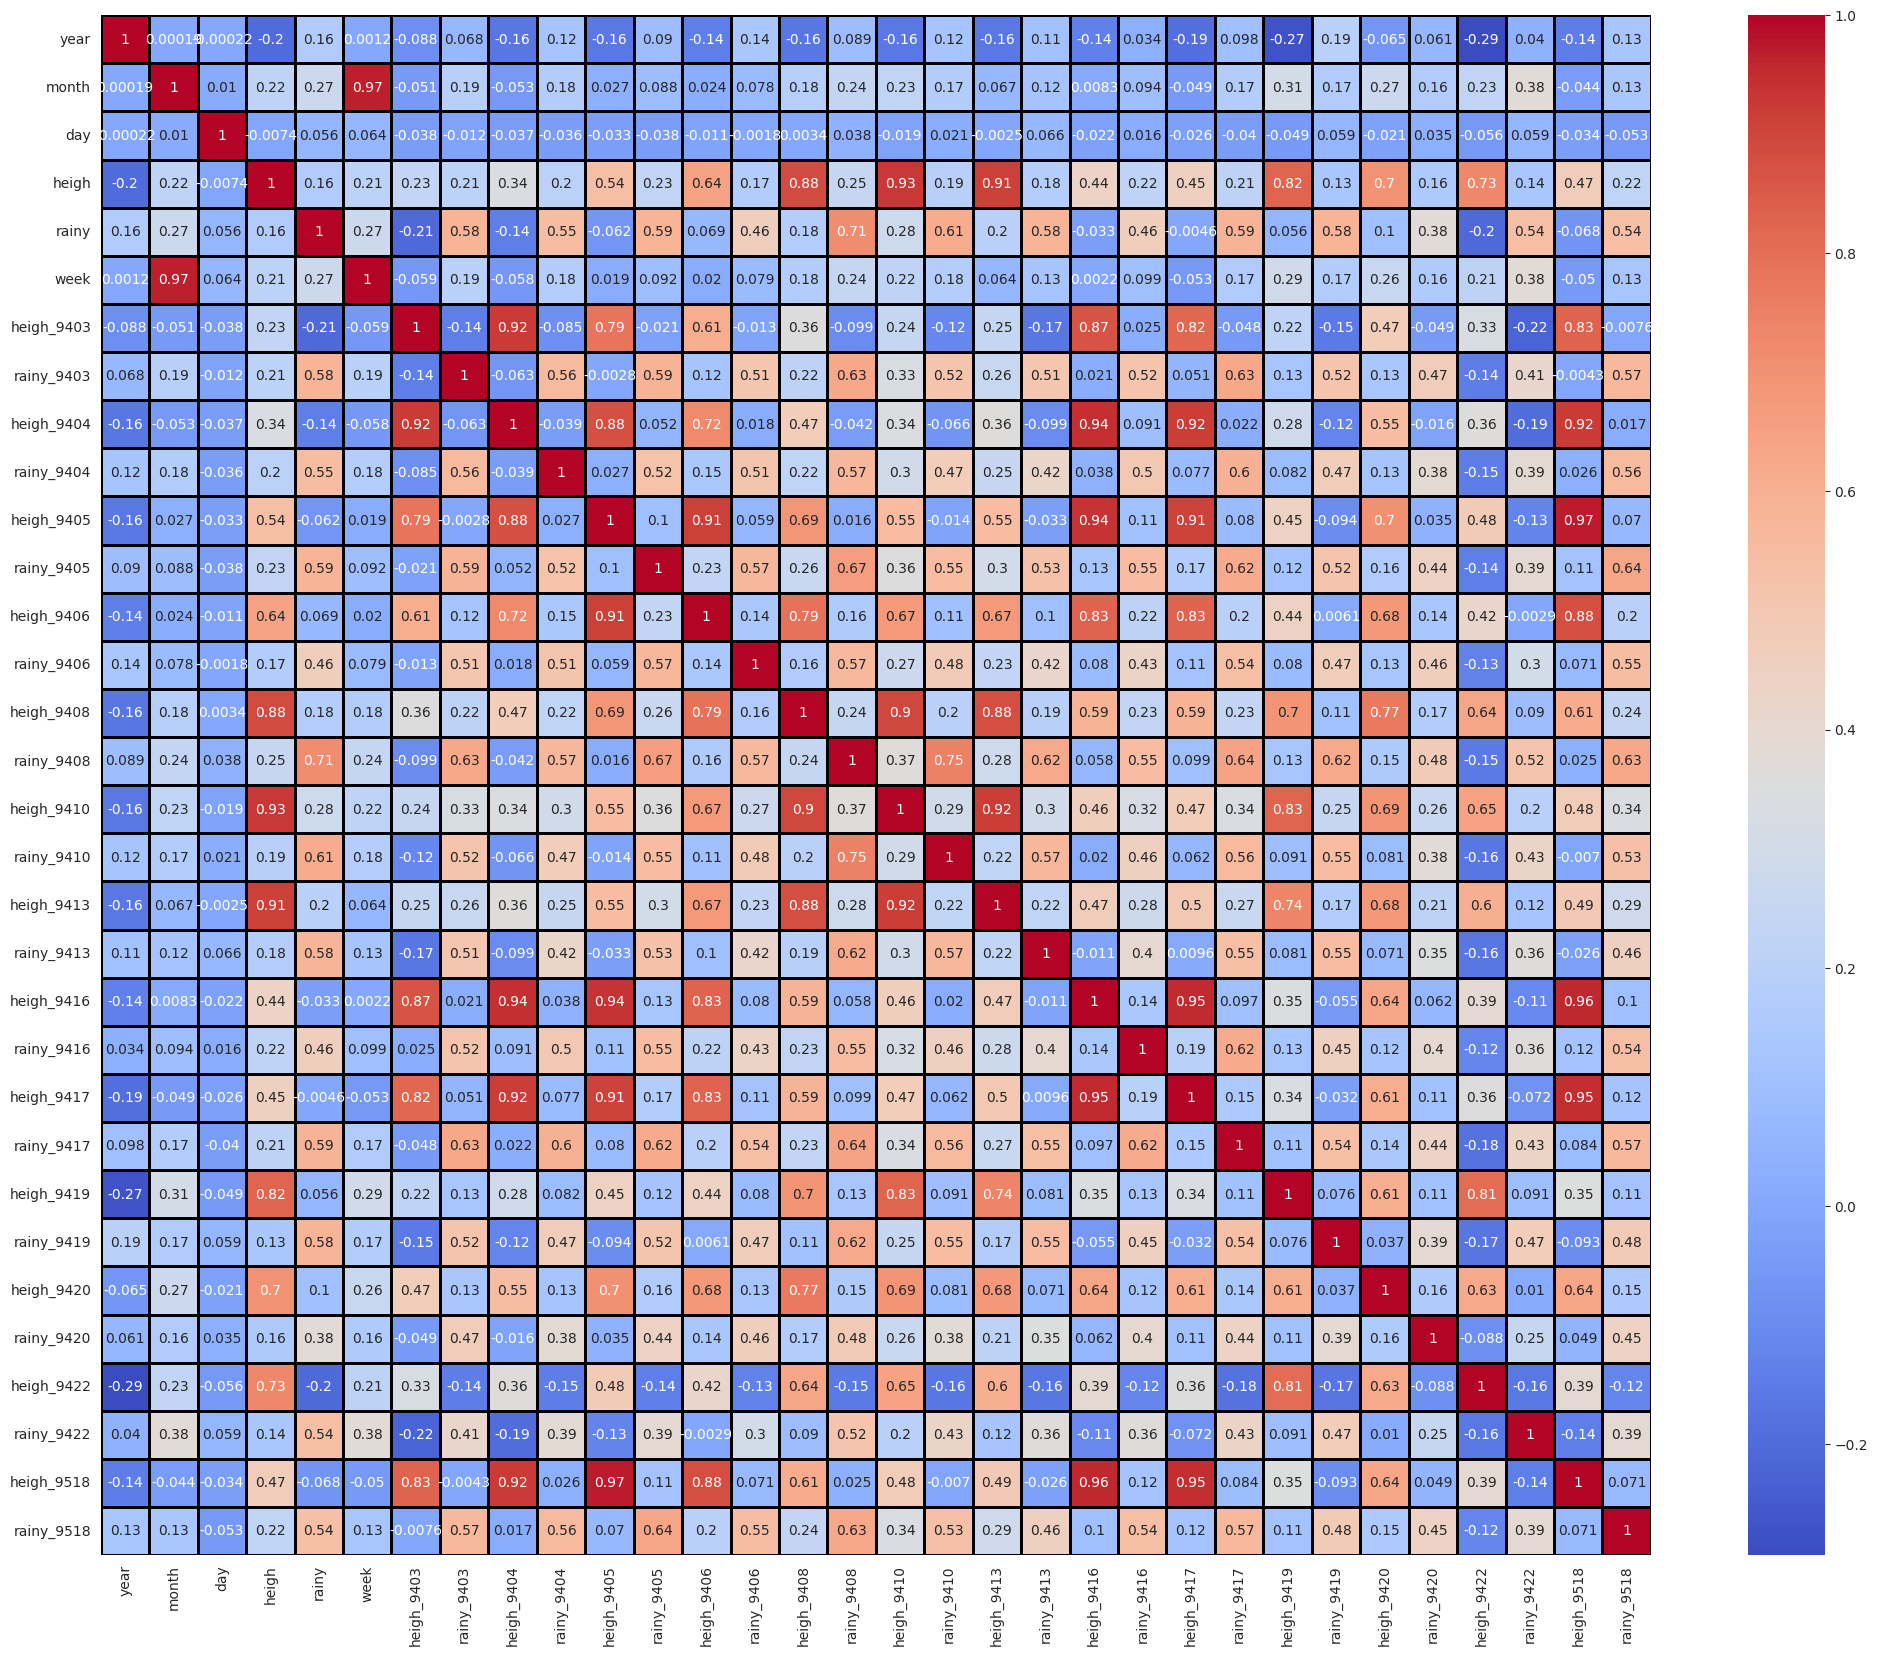

In [25]:
plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black');

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=34ba9c6eae96b166a2ba42cdb2f1da14600c889854a3fa817ae99a720c618b5a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Прежде чем произвести инжиниринг признаков и сократить объем входных данных, стоит определить, какие признаки имеют первостепенную значимость, и в этом нам поможет Scikit-Learn и критерий f_regression:

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [32]:
df_2 = df.drop('date', axis=1)

In [33]:
# UNIVARIATE FEATURE SELECTION
# drop target columns
drop_cols=['heigh']
X = df_2.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = df_2['heigh'] # y = target column (what we want to predict)
# instantiate SelectKBest to determine the best features
best_features = SelectKBest(score_func=f_regression, k=10)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(15,'Score'))  # print the best features

   Feature_Name         Score
15   heigh_9410  22184.538277
17   heigh_9413  17757.092460
13   heigh_9408  13085.758966
23   heigh_9419   7701.050968
27   heigh_9422   4123.328499
25   heigh_9420   3507.173666
11   heigh_9406   2574.833182
9    heigh_9405   1538.976579
29   heigh_9518   1016.137900
21   heigh_9417    929.820604
19   heigh_9416    863.310408
7    heigh_9404    465.449275
14   rainy_9408    239.449284
5    heigh_9403    211.010037
10   rainy_9405    206.000776


In [34]:
df_heigh.columns

Index(['year', 'month', 'week', 'heigh', 'heigh_9403', 'heigh_9404',
       'heigh_9405', 'heigh_9406', 'heigh_9408', 'heigh_9410', 'heigh_9413',
       'heigh_9416', 'heigh_9417', 'heigh_9419', 'heigh_9420', 'heigh_9422',
       'heigh_9518'],
      dtype='object')

In [35]:
df_heigh_13_14 = df[(df['year'] == 2013) | (df['year'] == 2014)]
df_heigh_13_14['year'].value_counts()

2013    365
2014    365
Name: year, dtype: int64

In [36]:
df_heigh_13_14.head()

,year,month,day,heigh,rainy,date,week,heigh_9403,rainy_9403,heigh_9404,...,heigh_9417,rainy_9417,heigh_9419,rainy_9419,heigh_9420,rainy_9420,heigh_9422,rainy_9422,heigh_9518,rainy_9518
1827,2013,1,1,634.0,21,2013-01-01,1.0,88.0,45,99.0,...,43.0,0,291.0,33,209.0,29,302.0,12,124.0,18
1828,2013,2,1,573.0,21,2013-02-01,5.0,108.0,13,103.0,...,43.0,0,288.0,33,208.0,1,262.0,12,124.0,10
1829,2013,3,1,540.0,21,2013-03-01,9.0,109.0,13,127.0,...,43.0,0,285.0,33,208.0,29,256.0,12,129.0,27
1830,2013,4,1,522.0,6,2013-04-01,14.0,112.0,45,132.0,...,43.0,40,281.0,48,206.0,43,239.0,23,141.0,29
1831,2013,5,1,559.0,40,2013-05-01,18.0,378.0,59,330.0,...,219.0,51,296.0,54,373.0,40,318.0,26,256.0,2


In [37]:
df_heigh_13_14_heigh = df_heigh_13_14[['year', 'heigh_9408', 'heigh_9410', 'heigh_9413', 'heigh_9406', 'heigh_9419']]

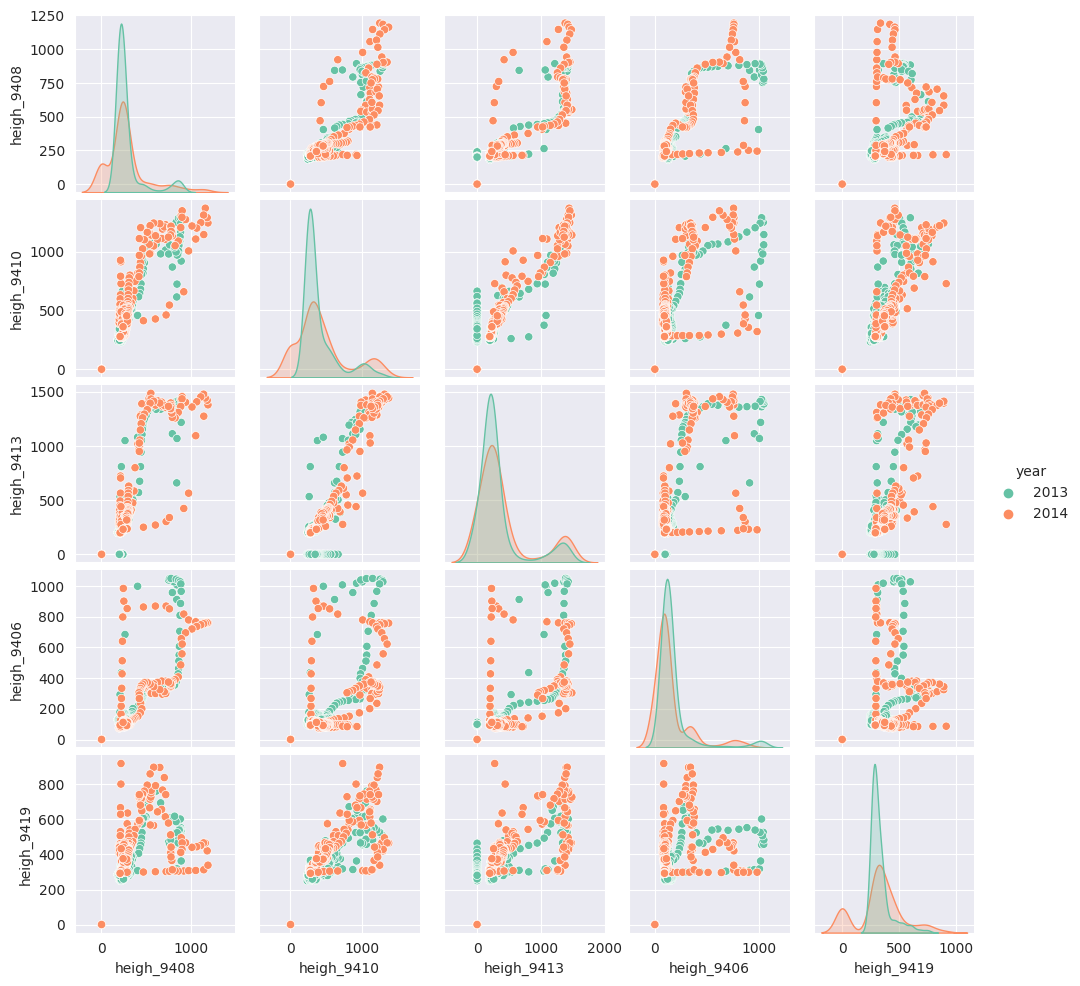

In [ ]:
sns.pairplot(df_heigh_13_14_heigh, hue='year', height=2, palette='Set2');

In [26]:
df_heigh_12_15 = df[(df['year'] == 2012) | (df['year'] == 2015)]

In [27]:
df_heigh_12_15_heigh = df_heigh_12_15[['year', 'heigh_9408', 'heigh_9410', 'heigh_9413', 'heigh_9406', 'heigh_9419']]

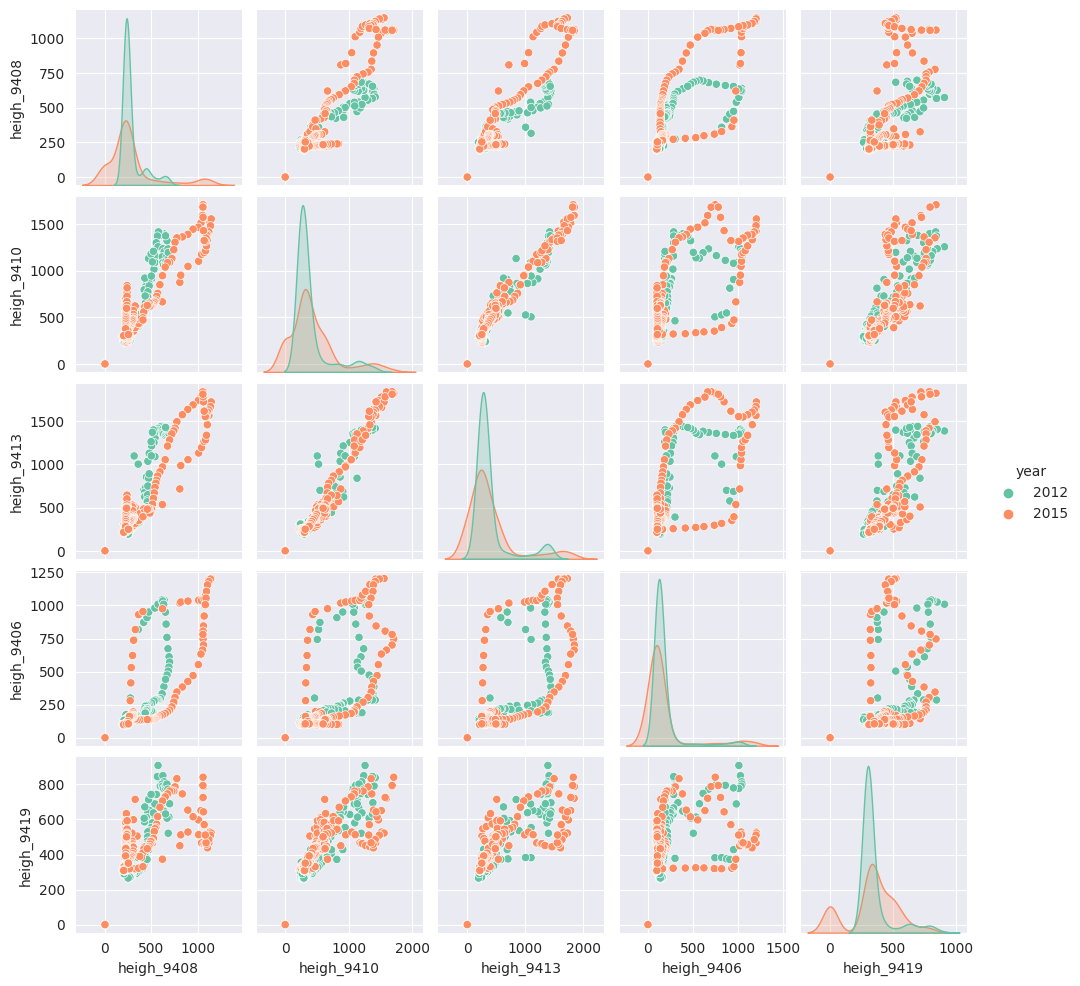

In [28]:
sns.pairplot(df_heigh_12_15_heigh, hue='year', height=2, palette='Set2');

In [38]:
df_heigh_13_14_heigh.head()

,year,heigh_9408,heigh_9410,heigh_9413,heigh_9406,heigh_9419
1827,2013,206.0,270.0,208.0,132.0,291.0
1828,2013,193.0,272.0,204.0,130.0,288.0
1829,2013,206.0,244.0,203.0,129.0,285.0
1830,2013,202.0,247.0,202.0,127.0,281.0
1831,2013,202.0,249.0,223.0,131.0,296.0


In [39]:
df_heigh_13_14['year'].value_counts()

2013    365
2014    365
Name: year, dtype: int64

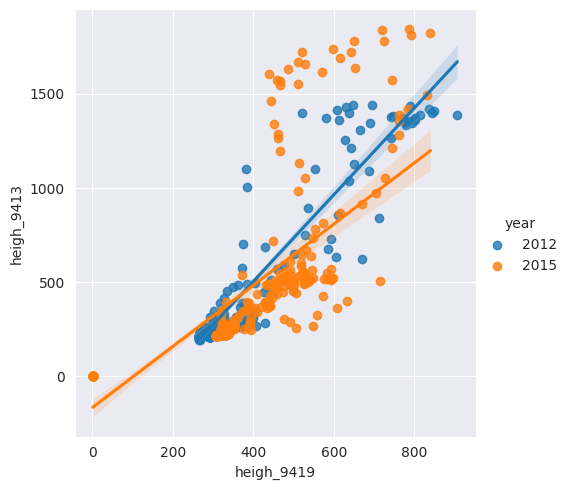

In [40]:
sns.lmplot(x="heigh_9419", y="heigh_9413", hue="year", data=df_heigh_12_15);

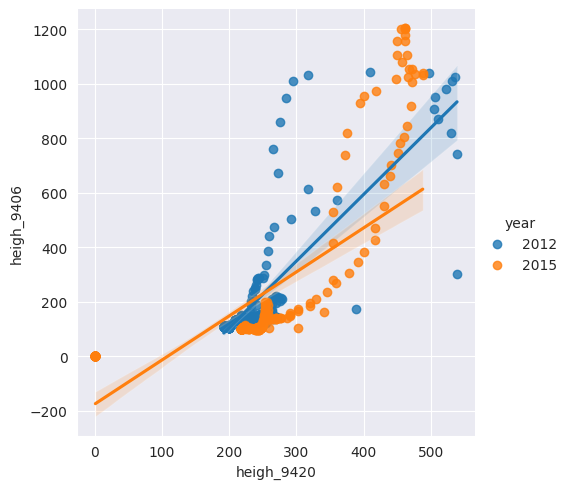

In [ ]:
sns.lmplot(x="heigh_9420", y="heigh_9406", hue="year", data=df_heigh_12_15);

In [ ]:
df_heigh_08_17 = df[(df['year'] == 2008) | (df['year'] == 2017)]

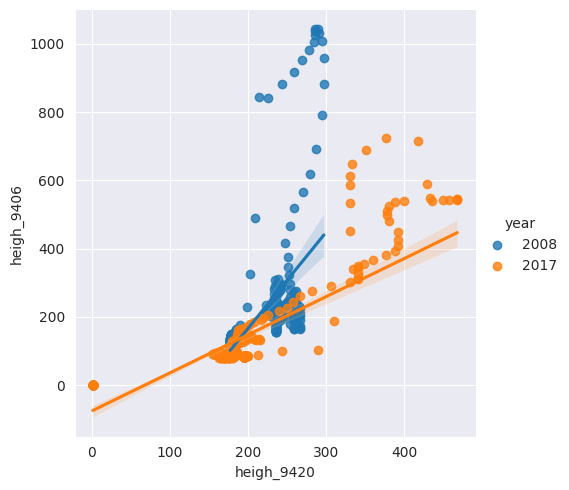

In [ ]:
sns.lmplot(x="heigh_9420", y="heigh_9406", hue="year", data=df_heigh_08_17);

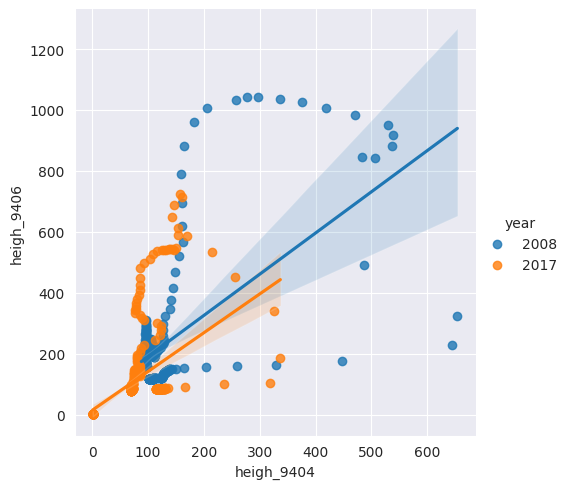

In [ ]:
sns.lmplot(x="heigh_9404", y="heigh_9406", hue="year", data=df_heigh_08_17);

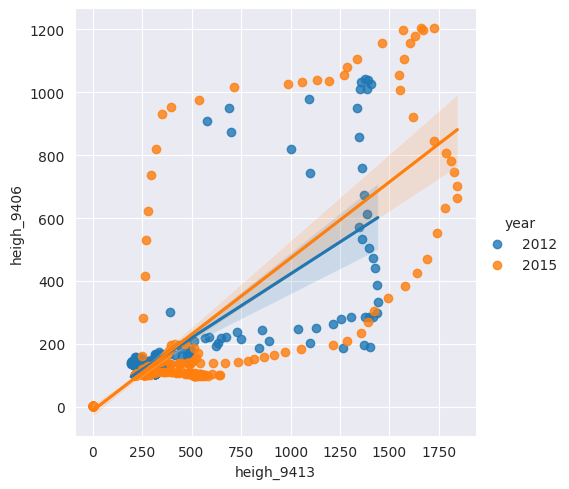

In [41]:
sns.lmplot(x="heigh_9413", y="heigh_9406", hue="year", data=df_heigh_12_15)

Посмотрим на сильно скоррелированные признаки

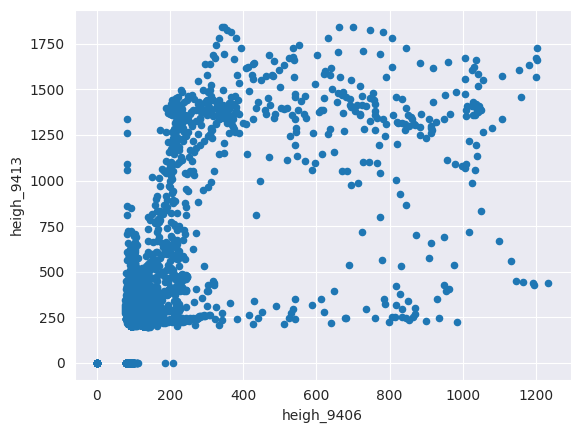

In [42]:
df.plot.scatter(x='heigh_9406', y='heigh_9413');

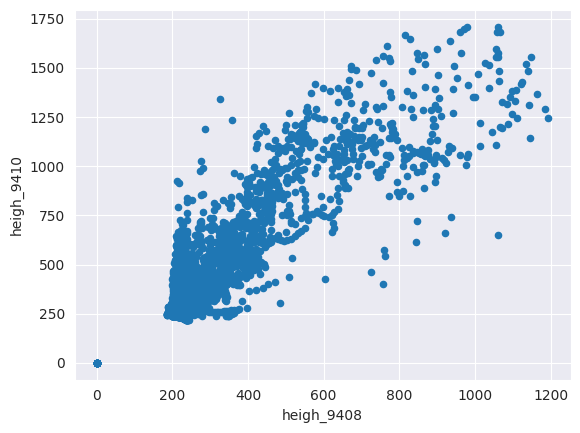

In [ ]:
df.plot.scatter(x='heigh_9408', y='heigh_9410');

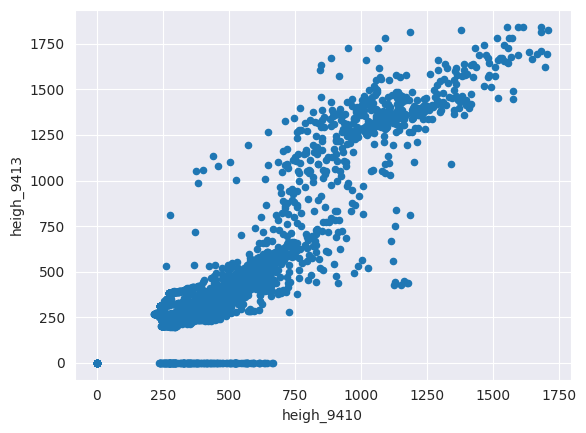

In [ ]:
df.plot.scatter(x='heigh_9410', y='heigh_9413');

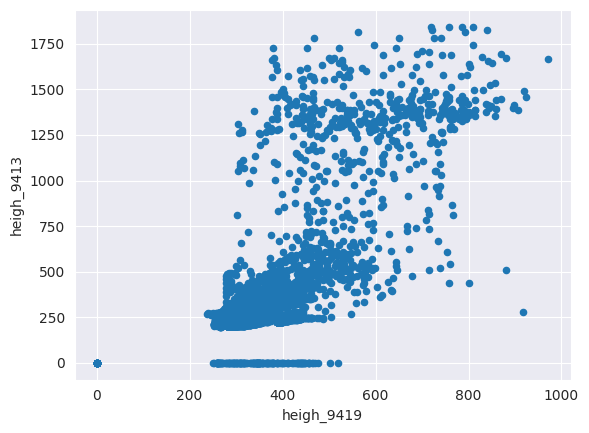

In [ ]:
df.plot.scatter(x='heigh_9419', y='heigh_9413');

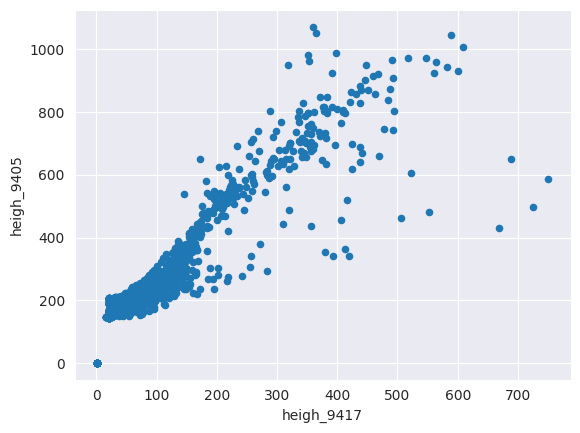

In [ ]:
df.plot.scatter(x='heigh_9417', y='heigh_9405');

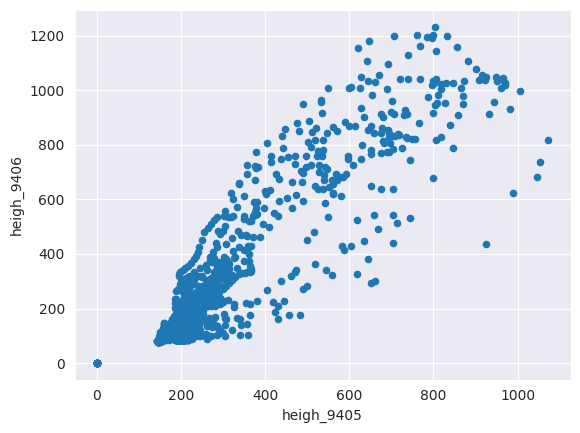

In [ ]:
df.plot.scatter(x='heigh_9405', y='heigh_9406');

In [43]:
df.to_csv('model.csv')